In [1]:
import requests
import pandas as pd

In [2]:
df = pd.read_csv('geo_sampling/bangkok-roads-s1k.csv')
#df = df.sample(5)

In [3]:
API_KEY = 'GOOGLE_MAPS_API_KEY'

## Get Google Maps Street View metadata

In [4]:
def gsv_metadata(lat, lon):
    data = {'key': API_KEY,
                'location':  '{0:f},{1:f}'.format(lat, lon)}
    r = requests.get('https://maps.googleapis.com/maps/api/streetview/metadata', params=data)
    if r.status_code == 200:
        return r.json()
    else:
        print("WARN: No metadata for {0:f},{1:f}".format(lat, lon))
        return None

In [5]:
df['gsv_metadata'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_metadata(r.start_lat, r.start_long), axis=1)

In [6]:
df

segment_id     osm_id           osm_name   osm_type  start_lat  \
0             3    9017482        ถนนพระราม 9    primary  13.754620   
1             4    9019480     ถนนพระรามที่ 1    primary  13.744500   
2             6    9166124                NaN    primary  13.763283   
3            17   23609995       ถนนเจริญกรุง   tertiary  13.747431   
4            23   23610163                NaN   tertiary  13.742837   
5            27   24678686    ถนนอังรีดูนังต์  secondary  13.739906   
6            40   24715228        ถนนข้าวหลาม   tertiary  13.736230   
7            47   24829068         ถนนสาทรใต้    primary  13.724676   
8            63   25053555     ถนนพระรามที่ 3    primary  13.716114   
9            71   25507862           อาจณรงค์   tertiary  13.696916   
10           73   25620825     ถนนศรีนครินทร์  secondary  13.656446   
11           82   25706388                NaN  secondary  13.740283   
12           87   25706526                NaN   tertiary  13.741536   
13          101   25714979                NaN   tertiary  13.757876   
14          111   25715223       ถนนศรีอยุธยา  secondary  13.769264   
15          112   25715256        ถนนอู่ทองใน   tertiary  13.770488   
16          121   25745236      ถนนรัชดาภิเษก    primary  13.689547   
17          130   25745938                NaN   tertiary  13.732684   
18          137   25775998        ถนนวัฒนธรรม   tertiary  13.762619   
19          167   26732625        ถนนเพชรเกษม    primary  13.713308   
20          175   27279308            ถนนทหาร   tertiary  13.798635   
21          176   27604257     ถนนศรีนครินทร์  secondary  13.656195   
22          182   28152580    สะพานพระปกเกล้า    primary  13.736476   
23          187   28503268                NaN   tertiary  13.740852   
24          193   28504804        ถนนสุขุมวิท    primary  13.711829   
25          196   28510028        สะพานกรุงธน    primary  13.780269   
26          214   30045712      สะพานพระราม 3    primary  13.694423   
27          222   31133741   ถนนพระยาสุเรนทร์   tertiary  13.835972   
28          226   31133741   ถนนพระยาสุเรนทร์   tertiary  13.818439   
29          232   31142740                NaN   tertiary  13.753075   
..          ...        ...                ...        ...        ...   
970        6083  471408292        ถนนประชาสุข   tertiary  13.785269   
971        6105  479211734                NaN    primary  13.757864   
972        6107  479213808        ถนนราชปรารภ  secondary  13.756085   
973        6125  480611709  ถนนประชาอุทิศ (รา   tertiary  13.762844   
974        6132  480611716  ถนนประชาอุทิศ (รา   tertiary  13.768324   
975        6139  480611724      ถนนประชาอุทิศ   tertiary  13.770158   
976        6141  480960861      ถนนประชาอุทิศ   tertiary  13.770706   
977        6145  480960865      ถนนประชาอุทิศ   tertiary  13.771612   
978        6159  480960879      ถนนประชาอุทิศ   tertiary  13.773639   
979        6179  481757225      ถนนประดิพัทธ์  secondary  13.791993   
980        6187  481757232     ถนนกำแพงเพชร 5   tertiary  13.788184   
981        6188  481757232     ถนนกำแพงเพชร 5   tertiary  13.783989   
982        6195  481778855      ถนนประดิพัทธ์  secondary  13.793233   
983        6201  481778861            ถนนทหาร   tertiary  13.796210   
984        6208  481971016     ถนนพระรามที่ 4    primary  13.720098   
985        6213  482209160        ถนนลาดพร้าว    primary  13.772326   
986        6214  482209160        ถนนลาดพร้าว    primary  13.774570   
987        6222  482209160        ถนนลาดพร้าว    primary  13.792521   
988        6228  482209834     ถนนพระรามที่ 4    primary  13.718828   
989        6230  482209836                NaN   tertiary  13.719026   
990        6231  482384842      ถนนเกษมราษฎร์   tertiary  13.714770   
991        6234  482384845                NaN   tertiary  13.714843   
992        6236  482384847      ถนนเกษมราษฎร์   tertiary  13.714695   
993        6237  482384848                NaN   tertiary  13.714695   
994        6243  482404741   

In [7]:
mdf = pd.concat([df, df.gsv_metadata.apply(pd.Series)], axis=1)

In [8]:
mdf

segment_id     osm_id           osm_name   osm_type  start_lat  \
0             3    9017482        ถนนพระราม 9    primary  13.754620   
1             4    9019480     ถนนพระรามที่ 1    primary  13.744500   
2             6    9166124                NaN    primary  13.763283   
3            17   23609995       ถนนเจริญกรุง   tertiary  13.747431   
4            23   23610163                NaN   tertiary  13.742837   
5            27   24678686    ถนนอังรีดูนังต์  secondary  13.739906   
6            40   24715228        ถนนข้าวหลาม   tertiary  13.736230   
7            47   24829068         ถนนสาทรใต้    primary  13.724676   
8            63   25053555     ถนนพระรามที่ 3    primary  13.716114   
9            71   25507862           อาจณรงค์   tertiary  13.696916   
10           73   25620825     ถนนศรีนครินทร์  secondary  13.656446   
11           82   25706388                NaN  secondary  13.740283   
12           87   25706526                NaN   tertiary  13.741536   
13          101   25714979                NaN   tertiary  13.757876   
14          111   25715223       ถนนศรีอยุธยา  secondary  13.769264   
15          112   25715256        ถนนอู่ทองใน   tertiary  13.770488   
16          121   25745236      ถนนรัชดาภิเษก    primary  13.689547   
17          130   25745938                NaN   tertiary  13.732684   
18          137   25775998        ถนนวัฒนธรรม   tertiary  13.762619   
19          167   26732625        ถนนเพชรเกษม    primary  13.713308   
20          175   27279308            ถนนทหาร   tertiary  13.798635   
21          176   27604257     ถนนศรีนครินทร์  secondary  13.656195   
22          182   28152580    สะพานพระปกเกล้า    primary  13.736476   
23          187   28503268                NaN   tertiary  13.740852   
24          193   28504804        ถนนสุขุมวิท    primary  13.711829   
25          196   28510028        สะพานกรุงธน    primary  13.780269   
26          214   30045712      สะพานพระราม 3    primary  13.694423   
27          222   31133741   ถนนพระยาสุเรนทร์   tertiary  13.835972   
28          226   31133741   ถนนพระยาสุเรนทร์   tertiary  13.818439   
29          232   31142740                NaN   tertiary  13.753075   
..          ...        ...                ...        ...        ...   
970        6083  471408292        ถนนประชาสุข   tertiary  13.785269   
971        6105  479211734                NaN    primary  13.757864   
972        6107  479213808        ถนนราชปรารภ  secondary  13.756085   
973        6125  480611709  ถนนประชาอุทิศ (รา   tertiary  13.762844   
974        6132  480611716  ถนนประชาอุทิศ (รา   tertiary  13.768324   
975        6139  480611724      ถนนประชาอุทิศ   tertiary  13.770158   
976        6141  480960861      ถนนประชาอุทิศ   tertiary  13.770706   
977        6145  480960865      ถนนประชาอุทิศ   tertiary  13.771612   
978        6159  480960879      ถนนประชาอุทิศ   tertiary  13.773639   
979        6179  481757225      ถนนประดิพัทธ์  secondary  13.791993   
980        6187  481757232     ถนนกำแพงเพชร 5   tertiary  13.788184   
981        6188  481757232     ถนนกำแพงเพชร 5   tertiary  13.783989   
982        6195  481778855      ถนนประดิพัทธ์  secondary  13.793233   
983        6201  481778861            ถนนทหาร   tertiary  13.796210   
984        6208  481971016     ถนนพระรามที่ 4    primary  13.720098   
985        6213  482209160        ถนนลาดพร้าว    primary  13.772326   
986        6214  482209160        ถนนลาดพร้าว    primary  13.774570   
987        6222  482209160        ถนนลาดพร้าว    primary  13.792521   
988        6228  482209834     ถนนพระรามที่ 4    primary  13.718828   
989        6230  482209836                NaN   tertiary  13.719026   
990        6231  482384842      ถนนเกษมราษฎร์   tertiary  13.714770   
991        6234  482384845                NaN   tertiary  13.714843   
992        6236  482384847      ถนนเกษมราษฎร์   tertiary  13.714695   
993        6237  482384848                NaN   tertiary  13.714695   
994        6243  482404741   

In [9]:
mdf[['osm_type', 'start_lat', 'start_long', 'date', 'status', 'pano_id', 'copyright']]

osm_type  start_lat  start_long     date status                 pano_id  \
0      primary  13.754620  100.583417  2018-02     OK  _fa_ostpbCnlUhKh4MAugQ   
1      primary  13.744500  100.540138  2017-11     OK  hU4No_3sFYcnQQBWS594bA   
2      primary  13.763283  100.545084  2017-06     OK  TtGIpsLy5cVxv4wzXPPQaQ   
3     tertiary  13.747431  100.494261  2018-02     OK  XsCVu9XHMpyMZtnd-7lkTg   
4     tertiary  13.742837  100.494840  2018-02     OK  9aPZFM7RNHEdY_KoFEBDcQ   
5    secondary  13.739906  100.534881  2017-11     OK  DS41k-JEKbY3jh6rqyQ7-A   
6     tertiary  13.736230  100.513590  2017-06     OK  hqDUe9EWCxE2K_g1DAmhqA   
7      primary  13.724676  100.540128  2017-09     OK  v1xfsqBOHinVkstFA_hHwA   
8      primary  13.716114  100.556871  2017-06     OK  e8kM77y1YYGKX78Qv0Pr_w   
9     tertiary  13.696916  100.589617  2018-03     OK  O6Ht7IBEL3YduUdzB0fEzg   
10   secondary  13.656446  100.642597  2017-12     OK  5wzjmD49s3H1ZbItSE70JA   
11   secondary  13.740283  100.497899  2018-02     OK  g4RuxODNawM14gdaGyWq4w   
12    tertiary  13.741536  100.497923  2018-02     OK  KxhQcKk_l4gRJz6ave8BNQ   
13    tertiary  13.757876  100.493795  2018-02     OK  XPP-CgKD04a0M58pFYDc2w   
14   secondary  13.769264  100.509204  2018-03     OK  A5s3nLXfDfUB1kng604p8g   
15    tertiary  13.770488  100.512990  2018-01     OK  NuoZIOQx9ne0l73BIwJb2Q   
16     primary  13.689547  100.522381  2018-03     OK  NxnCUmuY3oFVmGZYkbcJXA   
17    tertiary  13.732684  100.528786  2017-06     OK  9Rydvm2ofAOneYZatH61ZA   
18    tertiary  13.762619  100.572623  2018-02     OK  UEvgkB133pez1RSlmZTMkw   
19     primary  13.713308  100.438334  2017-12     OK  6SI5nfw3uvvsBMJ391AqqQ   
20    tertiary  13.798635  100.517491  2018-02     OK  AljSH0TDrLYZXbYo4gPHaA   
21   secondary  13.656195  100.642553  2017-08     OK  zWsycOR4GsPurxIfqbE2Xg   
22     primary  13.736476  100.496584  2018-02     OK  3qOkx8ZJqvpKlIfsQMiF9Q   
23    tertiary  13.740852  100.645933  2018-05     OK  nSw9d5uBa2NfSS11Ok-xaA   
24     primary  13.711829  100.596111  2018-03     OK  JPxG2quBf66RPW07r6nvrg   
25     primary  13.780269  100.504223  2018-08     OK  9xRZ84wsfgiNFOlNJdgDcg   
26     primary  13.694423  100.499484  2017-09     OK  QEbpNZjt3MyTeoFqq7JX6Q   
27    tertiary  13.835972  100.697260  2018-05     OK  Qabz7vO8oJhvZdI-6cJ-_Q   
28    tertiary  13.818439  100.699062  2018-05     OK  i24LKjpd3xHh8AlSgGTJmg   
29    tertiary  13.753075  100.773712  2017-11     OK  k_0fLrZYN29yjxWoAKRgLA   
..         ...        ...         ...      ...    ...                     ...   
970   tertiary  13.785269  100.567073  2018-03     OK  VVJ5ZFsZvxo9-e6-GmAIsw   
971    primary  13.757864  100.534246  2018-02     OK  zlohipYk97rWInSLsedACA   
972  secondary  13.756085  100.542415  2018-07     OK  bKyT9lWJ9AE4-4orzu8LKg   
973   tertiary  13.762844  100.607836  2017-12     OK  vsQh71YXm0yKM2SpNBkIQA   
974   tertiary  13.768324  100.595428  2018-03     OK  n3-03g4VST-4OCl8EBHpjw   
975   tertiary  13.770158  100.585848  2018-03     OK  OIB3G2jdIUnZG2OYgLz2Vw   
976   tertiary  13.770706  100.584724  2018-03     OK  nKkIWEoU2_tAmzSYDY5a0g   
977   tertiary  13.771612  100.582223  2018-03     OK  ZLKbQa81JqTL86zis9tACg   
978   tertiary  13.773639  100.578440  2018-03     OK  g2HycwywF95RRtVn_6kdmw   
979  secondary  13.791993  100.537381  2018-03     OK  -avdK2pteFxkqc0I3Z96Wg   
980   tertiary  13.788184  100.533691  2012-02     OK  LJtSIzglX5195LoZclBZLw   
981   tertiary  13.783989  100.531972  2018-03     OK  bhCRyTsAkeFaiSbuaIoggg   
982  secondary  13.793233  100.531058  2018-02     OK  S3dLzgVHZP3A9ELZXNfrZA   
983   tertiary  13.796210  100.524116  2018-02     OK  LwO0PK2zvTX2Dyd9zHWLew   
984    primary  13.720098  100.559144  2017-06     OK  meKdXvwxTWXhwoSg-x5U_A   
985    primary  13.772326  100.633825  2018-06     OK  4N7XxLvTUuPpIOJeYXbHdw   
986    primary  13.774570  100.629811  2018-06     OK  pMTQJxiDbA3iiPhX4AeVvA   
987    primary  13.792521  100.597713

In [10]:
### Credit: https://gist.github.com/jeromer/2005586#file-compassbearing-py

import math

def calculate_initial_compass_bearing(pointA, pointB):
    """
    Calculates the bearing between two points.
    The formulae used is the following:
        θ = atan2(sin(Δlong).cos(lat2),
                  cos(lat1).sin(lat2) − sin(lat1).cos(lat2).cos(Δlong))
    :Parameters:
      - `pointA: The tuple representing the latitude/longitude for the
        first point. Latitude and longitude must be in decimal degrees
      - `pointB: The tuple representing the latitude/longitude for the
        second point. Latitude and longitude must be in decimal degrees
    :Returns:
      The bearing in degrees
    :Returns Type:
      float
    """
    if (type(pointA) != tuple) or (type(pointB) != tuple):
        raise TypeError("Only tuples are supported as arguments")

    lat1 = math.radians(pointA[0])
    lat2 = math.radians(pointB[0])

    diffLong = math.radians(pointB[1] - pointA[1])

    x = math.sin(diffLong) * math.cos(lat2)
    y = math.cos(lat1) * math.sin(lat2) - (math.sin(lat1)
            * math.cos(lat2) * math.cos(diffLong))

    initial_bearing = math.atan2(x, y)

    # Now we have the initial bearing but math.atan2 return values
    # from -180° to + 180° which is not what we want for a compass bearing
    # The solution is to normalize the initial bearing as shown below
    initial_bearing = math.degrees(initial_bearing)
    compass_bearing = (initial_bearing + 360) % 360

    return compass_bearing

In [11]:
mdf['road_angle'] = mdf.apply(lambda c: calculate_initial_compass_bearing((c.start_lat, c.start_long), (c.end_lat, c.end_long)), axis=1)
mdf

segment_id     osm_id           osm_name   osm_type  start_lat  \
0             3    9017482        ถนนพระราม 9    primary  13.754620   
1             4    9019480     ถนนพระรามที่ 1    primary  13.744500   
2             6    9166124                NaN    primary  13.763283   
3            17   23609995       ถนนเจริญกรุง   tertiary  13.747431   
4            23   23610163                NaN   tertiary  13.742837   
5            27   24678686    ถนนอังรีดูนังต์  secondary  13.739906   
6            40   24715228        ถนนข้าวหลาม   tertiary  13.736230   
7            47   24829068         ถนนสาทรใต้    primary  13.724676   
8            63   25053555     ถนนพระรามที่ 3    primary  13.716114   
9            71   25507862           อาจณรงค์   tertiary  13.696916   
10           73   25620825     ถนนศรีนครินทร์  secondary  13.656446   
11           82   25706388                NaN  secondary  13.740283   
12           87   25706526                NaN   tertiary  13.741536   
13          101   25714979                NaN   tertiary  13.757876   
14          111   25715223       ถนนศรีอยุธยา  secondary  13.769264   
15          112   25715256        ถนนอู่ทองใน   tertiary  13.770488   
16          121   25745236      ถนนรัชดาภิเษก    primary  13.689547   
17          130   25745938                NaN   tertiary  13.732684   
18          137   25775998        ถนนวัฒนธรรม   tertiary  13.762619   
19          167   26732625        ถนนเพชรเกษม    primary  13.713308   
20          175   27279308            ถนนทหาร   tertiary  13.798635   
21          176   27604257     ถนนศรีนครินทร์  secondary  13.656195   
22          182   28152580    สะพานพระปกเกล้า    primary  13.736476   
23          187   28503268                NaN   tertiary  13.740852   
24          193   28504804        ถนนสุขุมวิท    primary  13.711829   
25          196   28510028        สะพานกรุงธน    primary  13.780269   
26          214   30045712      สะพานพระราม 3    primary  13.694423   
27          222   31133741   ถนนพระยาสุเรนทร์   tertiary  13.835972   
28          226   31133741   ถนนพระยาสุเรนทร์   tertiary  13.818439   
29          232   31142740                NaN   tertiary  13.753075   
..          ...        ...                ...        ...        ...   
970        6083  471408292        ถนนประชาสุข   tertiary  13.785269   
971        6105  479211734                NaN    primary  13.757864   
972        6107  479213808        ถนนราชปรารภ  secondary  13.756085   
973        6125  480611709  ถนนประชาอุทิศ (รา   tertiary  13.762844   
974        6132  480611716  ถนนประชาอุทิศ (รา   tertiary  13.768324   
975        6139  480611724      ถนนประชาอุทิศ   tertiary  13.770158   
976        6141  480960861      ถนนประชาอุทิศ   tertiary  13.770706   
977        6145  480960865      ถนนประชาอุทิศ   tertiary  13.771612   
978        6159  480960879      ถนนประชาอุทิศ   tertiary  13.773639   
979        6179  481757225      ถนนประดิพัทธ์  secondary  13.791993   
980        6187  481757232     ถนนกำแพงเพชร 5   tertiary  13.788184   
981        6188  481757232     ถนนกำแพงเพชร 5   tertiary  13.783989   
982        6195  481778855      ถนนประดิพัทธ์  secondary  13.793233   
983        6201  481778861            ถนนทหาร   tertiary  13.796210   
984        6208  481971016     ถนนพระรามที่ 4    primary  13.720098   
985        6213  482209160        ถนนลาดพร้าว    primary  13.772326   
986        6214  482209160        ถนนลาดพร้าว    primary  13.774570   
987        6222  482209160        ถนนลาดพร้าว    primary  13.792521   
988        6228  482209834     ถนนพระรามที่ 4    primary  13.718828   
989        6230  482209836                NaN   tertiary  13.719026   
990        6231  482384842      ถนนเกษมราษฎร์   tertiary  13.714770   
991        6234  482384845                NaN   tertiary  13.714843   
992        6236  482384847      ถนนเกษมราษฎร์   tertiary  13.714695   
993        6237  482384848                NaN   tertiary  13.714695   
994        6243  482404741   

In [12]:
mdf.groupby('date').agg({'status': 'count'})

status
date           
2011-09       8
2011-10       4
2011-12       5
2012-01       3
2012-02       5
2012-03       2
2014-09       2
2014-10       1
2016-07       5
2016-08       7
2016-09       5
2016-10       5
2016-11      14
2017-04       7
2017-05       5
2017-06      26
2017-07       9
2017-08      33
2017-09      14
2017-10      17
2017-11      71
2017-12      32
2018-01      25
2018-02      93
2018-03      93
2018-04      45
2018-05     104
2018-06     116
2018-07      43
2018-08     168
2018-09      10
2018-10      22

In [13]:
mdf[mdf.status != 'OK']

segment_id     osm_id osm_name  osm_type  start_lat  start_long  \
807        5075  337267107      NaN  tertiary  13.880448  100.605272   

       end_lat   end_long                gsv_metadata copyright date location  \
807  13.881686  100.60049  {'status': 'ZERO_RESULTS'}       NaN  NaN      NaN   

    pano_id        status  road_angle  
807     NaN  ZERO_RESULTS  284.928791

In [14]:
df = mdf[mdf.status == 'OK'].copy()
df

segment_id     osm_id           osm_name   osm_type  start_lat  \
0             3    9017482        ถนนพระราม 9    primary  13.754620   
1             4    9019480     ถนนพระรามที่ 1    primary  13.744500   
2             6    9166124                NaN    primary  13.763283   
3            17   23609995       ถนนเจริญกรุง   tertiary  13.747431   
4            23   23610163                NaN   tertiary  13.742837   
5            27   24678686    ถนนอังรีดูนังต์  secondary  13.739906   
6            40   24715228        ถนนข้าวหลาม   tertiary  13.736230   
7            47   24829068         ถนนสาทรใต้    primary  13.724676   
8            63   25053555     ถนนพระรามที่ 3    primary  13.716114   
9            71   25507862           อาจณรงค์   tertiary  13.696916   
10           73   25620825     ถนนศรีนครินทร์  secondary  13.656446   
11           82   25706388                NaN  secondary  13.740283   
12           87   25706526                NaN   tertiary  13.741536   
13          101   25714979                NaN   tertiary  13.757876   
14          111   25715223       ถนนศรีอยุธยา  secondary  13.769264   
15          112   25715256        ถนนอู่ทองใน   tertiary  13.770488   
16          121   25745236      ถนนรัชดาภิเษก    primary  13.689547   
17          130   25745938                NaN   tertiary  13.732684   
18          137   25775998        ถนนวัฒนธรรม   tertiary  13.762619   
19          167   26732625        ถนนเพชรเกษม    primary  13.713308   
20          175   27279308            ถนนทหาร   tertiary  13.798635   
21          176   27604257     ถนนศรีนครินทร์  secondary  13.656195   
22          182   28152580    สะพานพระปกเกล้า    primary  13.736476   
23          187   28503268                NaN   tertiary  13.740852   
24          193   28504804        ถนนสุขุมวิท    primary  13.711829   
25          196   28510028        สะพานกรุงธน    primary  13.780269   
26          214   30045712      สะพานพระราม 3    primary  13.694423   
27          222   31133741   ถนนพระยาสุเรนทร์   tertiary  13.835972   
28          226   31133741   ถนนพระยาสุเรนทร์   tertiary  13.818439   
29          232   31142740                NaN   tertiary  13.753075   
..          ...        ...                ...        ...        ...   
970        6083  471408292        ถนนประชาสุข   tertiary  13.785269   
971        6105  479211734                NaN    primary  13.757864   
972        6107  479213808        ถนนราชปรารภ  secondary  13.756085   
973        6125  480611709  ถนนประชาอุทิศ (รา   tertiary  13.762844   
974        6132  480611716  ถนนประชาอุทิศ (รา   tertiary  13.768324   
975        6139  480611724      ถนนประชาอุทิศ   tertiary  13.770158   
976        6141  480960861      ถนนประชาอุทิศ   tertiary  13.770706   
977        6145  480960865      ถนนประชาอุทิศ   tertiary  13.771612   
978        6159  480960879      ถนนประชาอุทิศ   tertiary  13.773639   
979        6179  481757225      ถนนประดิพัทธ์  secondary  13.791993   
980        6187  481757232     ถนนกำแพงเพชร 5   tertiary  13.788184   
981        6188  481757232     ถนนกำแพงเพชร 5   tertiary  13.783989   
982        6195  481778855      ถนนประดิพัทธ์  secondary  13.793233   
983        6201  481778861            ถนนทหาร   tertiary  13.796210   
984        6208  481971016     ถนนพระรามที่ 4    primary  13.720098   
985        6213  482209160        ถนนลาดพร้าว    primary  13.772326   
986        6214  482209160        ถนนลาดพร้าว    primary  13.774570   
987        6222  482209160        ถนนลาดพร้าว    primary  13.792521   
988        6228  482209834     ถนนพระรามที่ 4    primary  13.718828   
989        6230  482209836                NaN   tertiary  13.719026   
990        6231  482384842      ถนนเกษมราษฎร์   tertiary  13.714770   
991        6234  482384845                NaN   tertiary  13.714843   
992        6236  482384847      ถนนเกษมราษฎร์   tertiary  13.714695   
993        6237  482384848                NaN   tertiary  13.714695   
994        6243  482404741   

## Get Google Maps Street View Image

In [15]:
from base64 import b64encode, b64decode

def gsv_image(lat, lon, heading=0, pitch=0, size='640x640'):
    heading = int(heading) % 360
    data = {'key': API_KEY,
                'location':  '{0:f},{1:f}'.format(lat, lon),
                'heading': '{0:d}'.format(heading),
                'pitch': '{0:d}'.format(pitch),
                'size': size}
    r = requests.get('https://maps.googleapis.com/maps/api/streetview', params=data)
    if r.status_code == 200:
        return b64encode(r.content)
    else:
        print(r.status_code)
        #print(r.text)
        print("WARN: No image data for {0:f},{1:f}".format(lat, lon))
        return None

In [16]:
df['img0'] = df[['start_lat', 'start_long', 'road_angle']].apply(lambda r: gsv_image(r.start_lat, r.start_long, r.road_angle + 0, -15), axis=1)

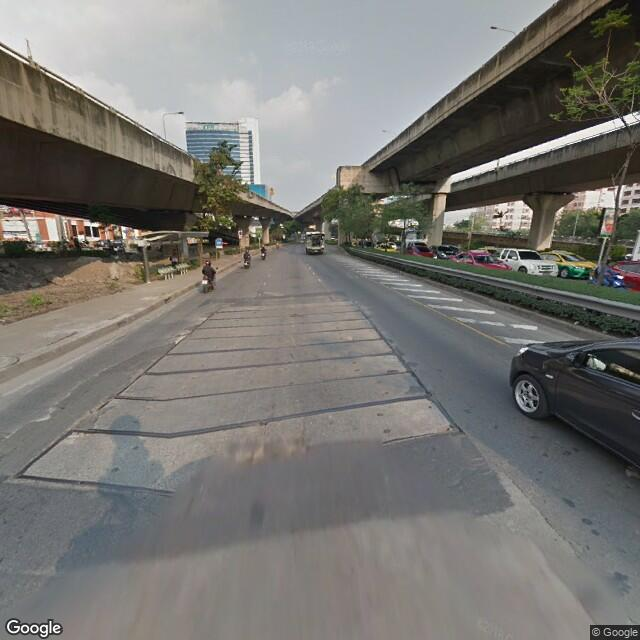

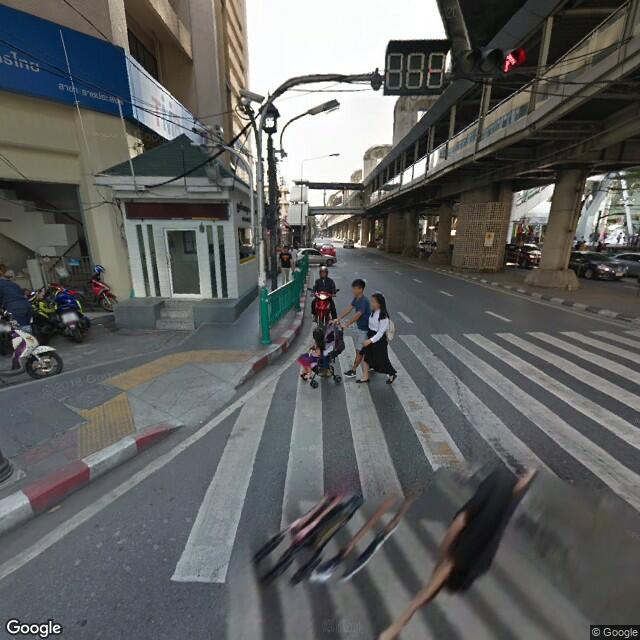

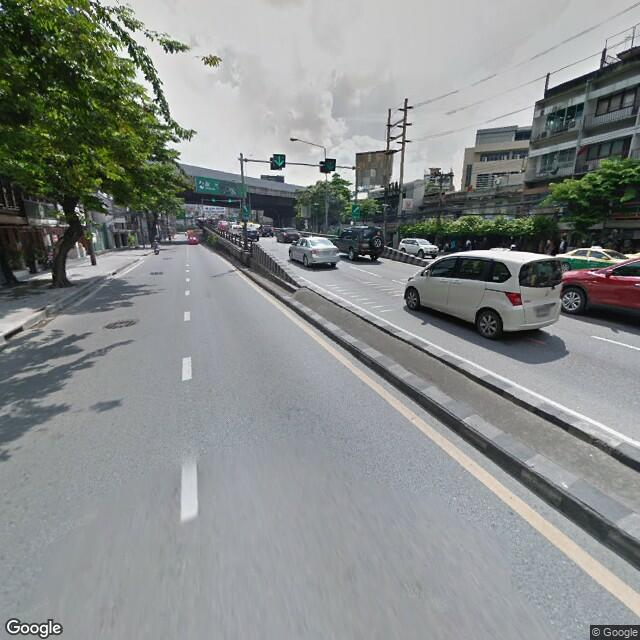

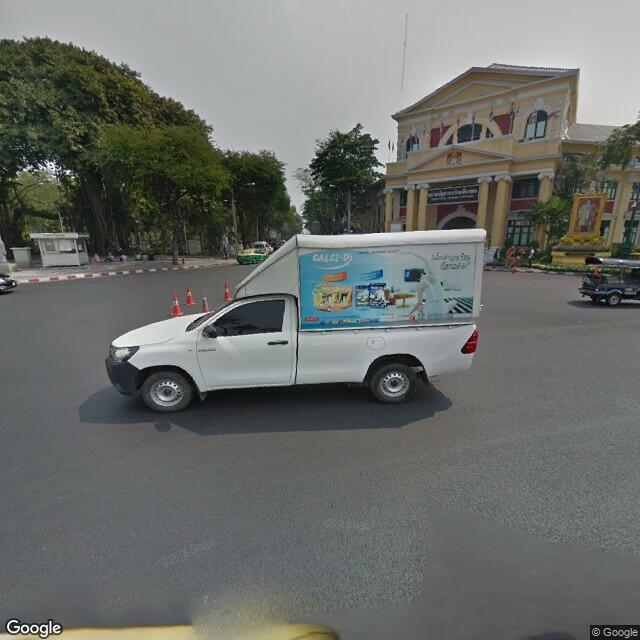

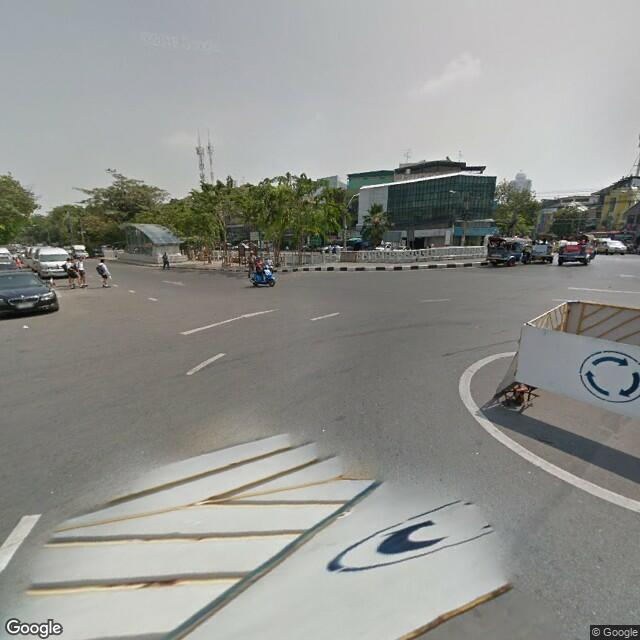

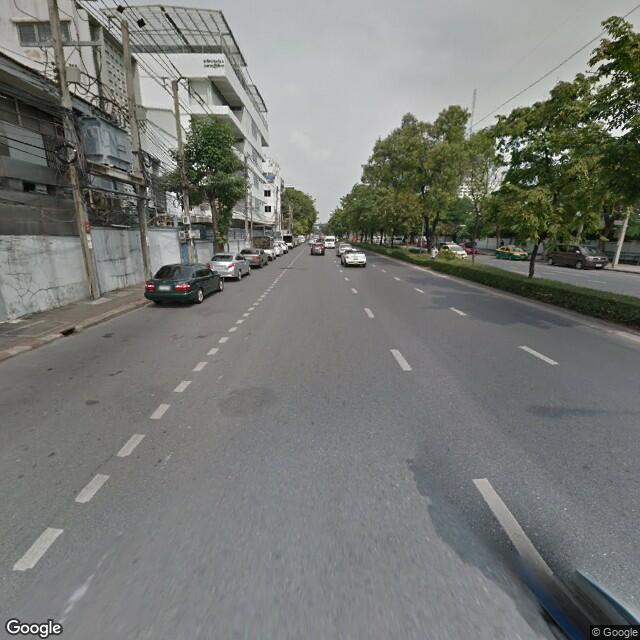

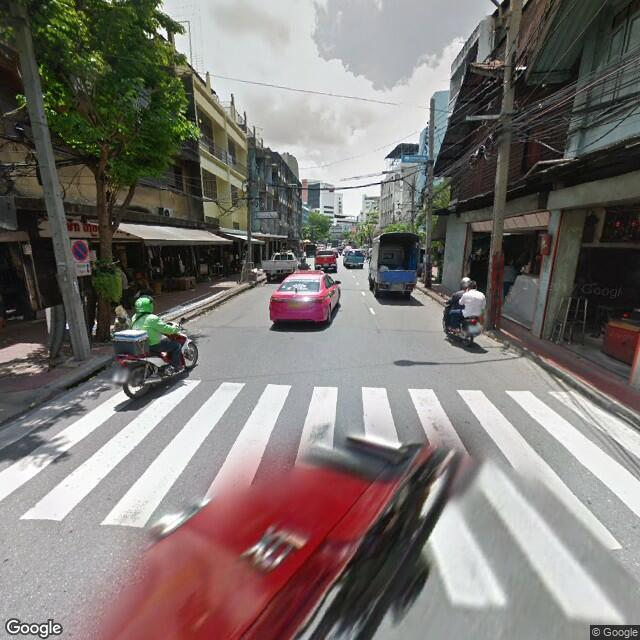

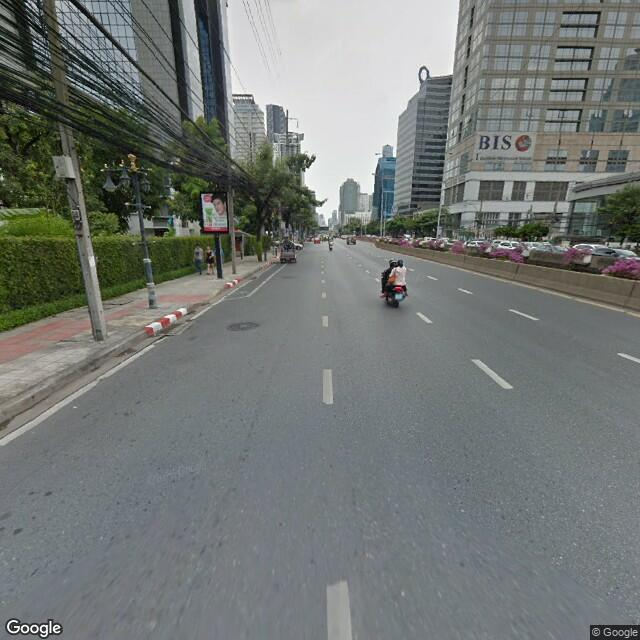

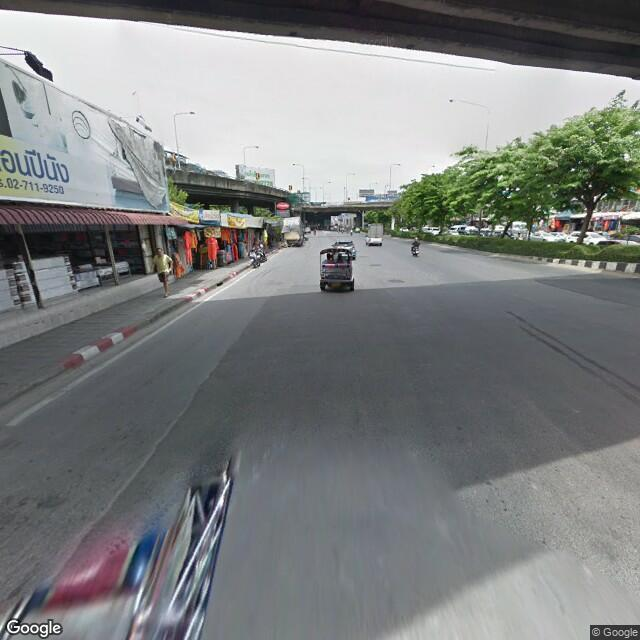

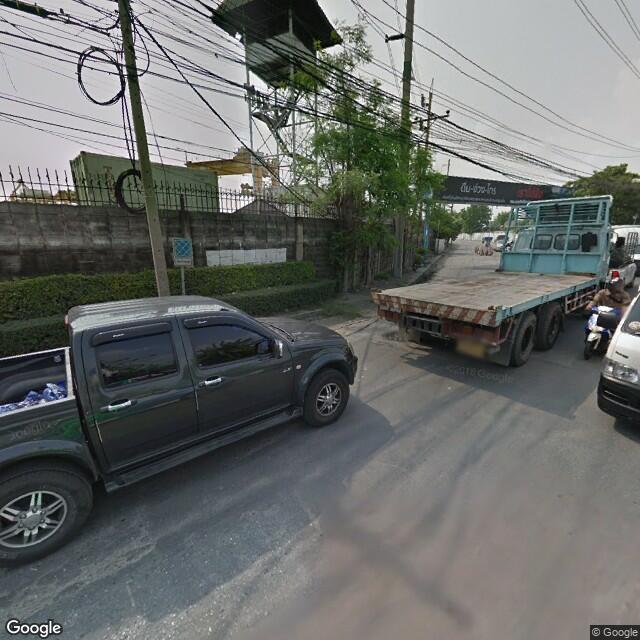

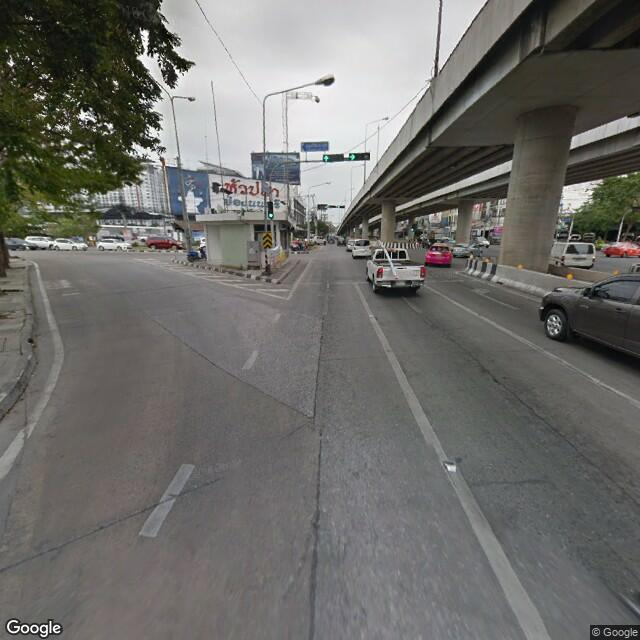

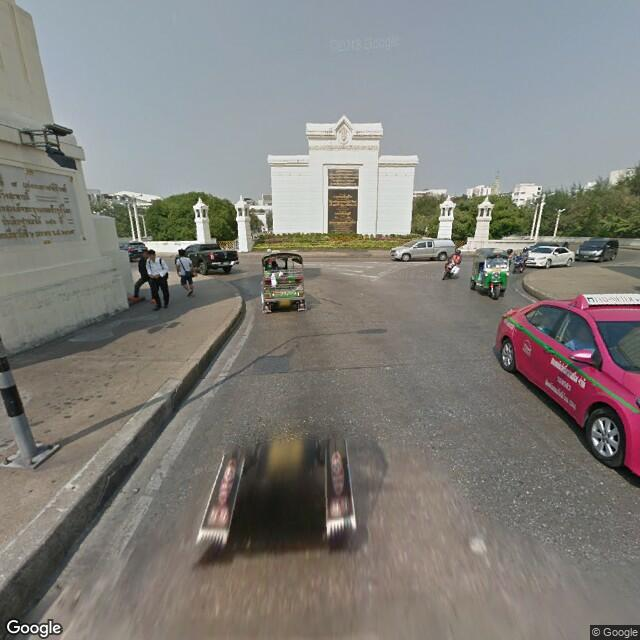

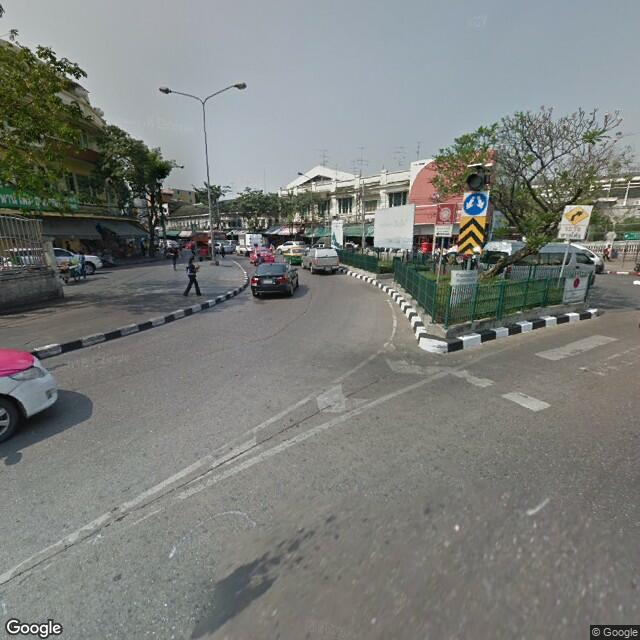

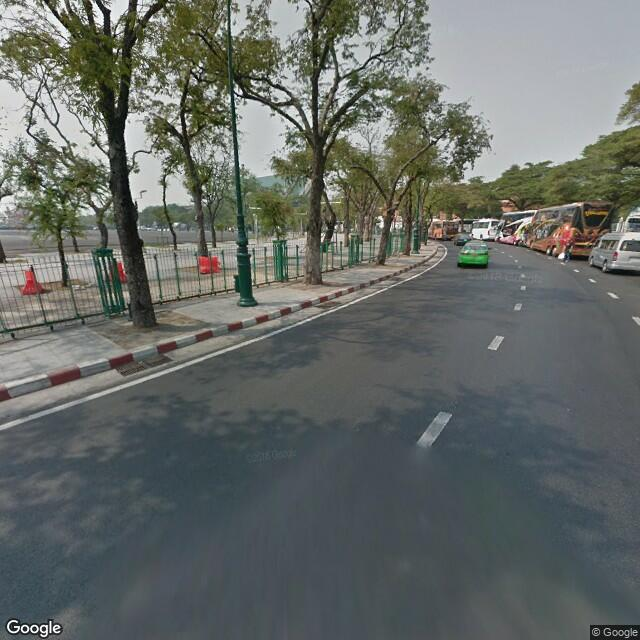

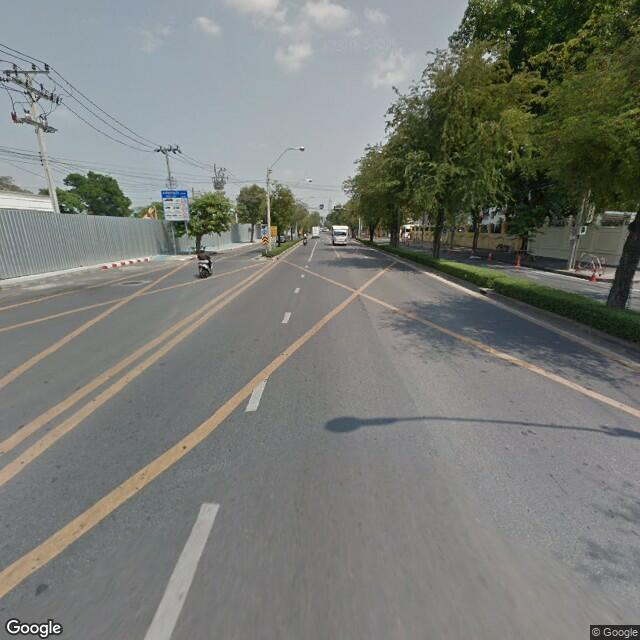

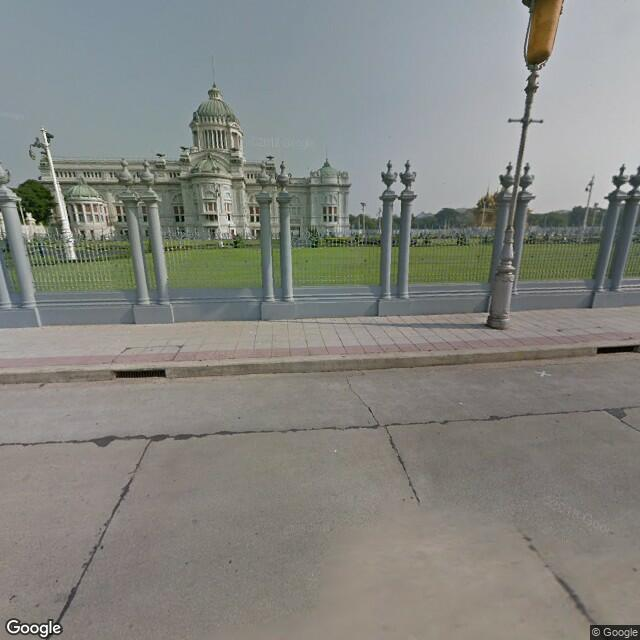

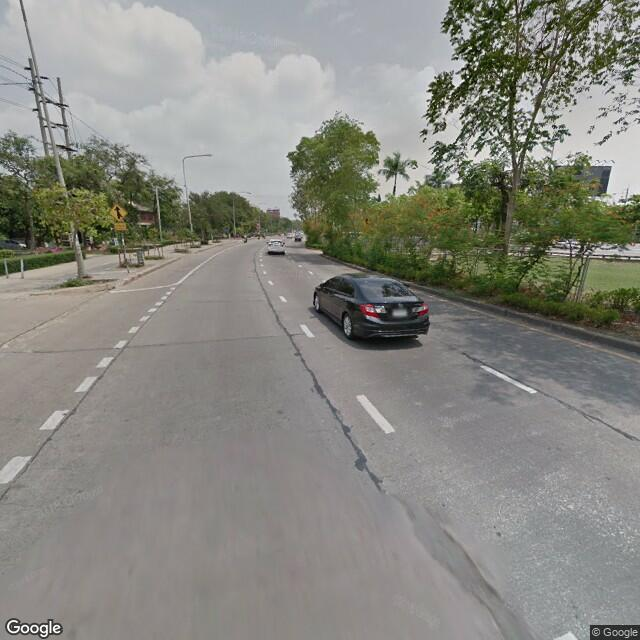

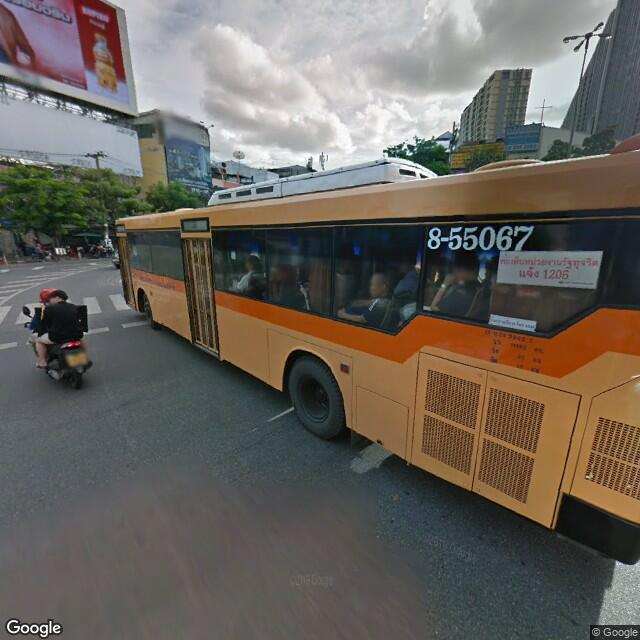

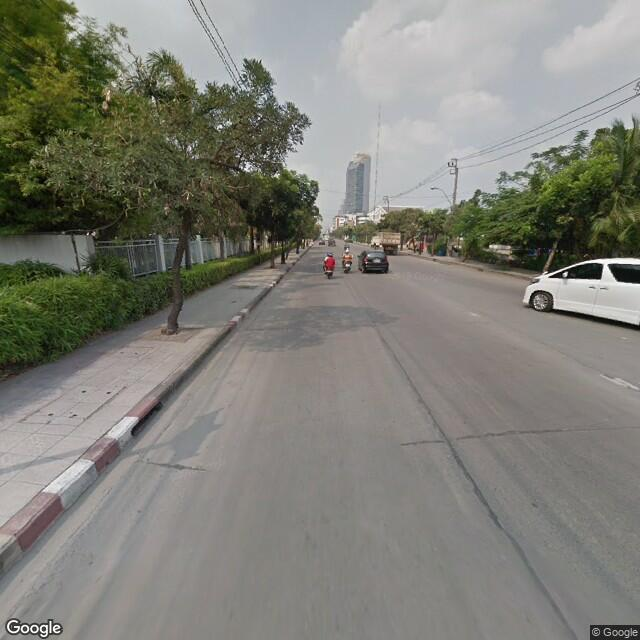

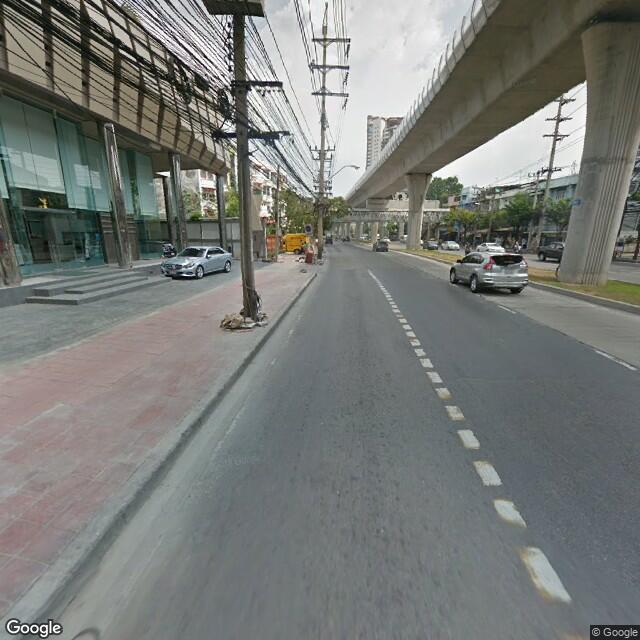

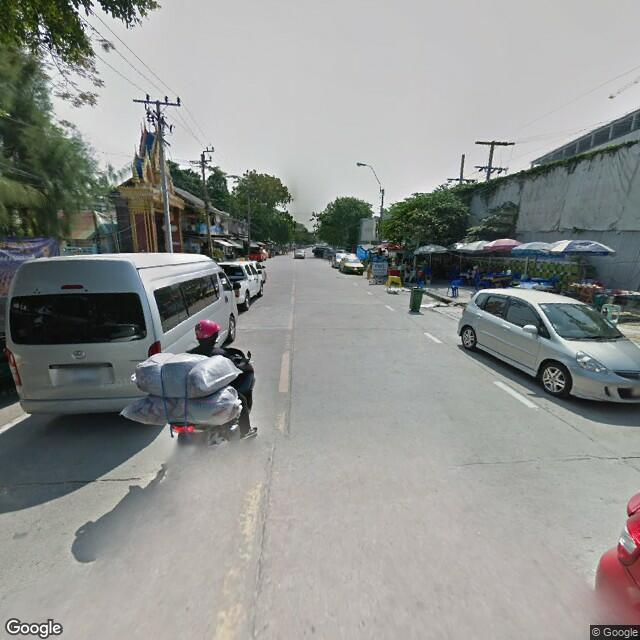

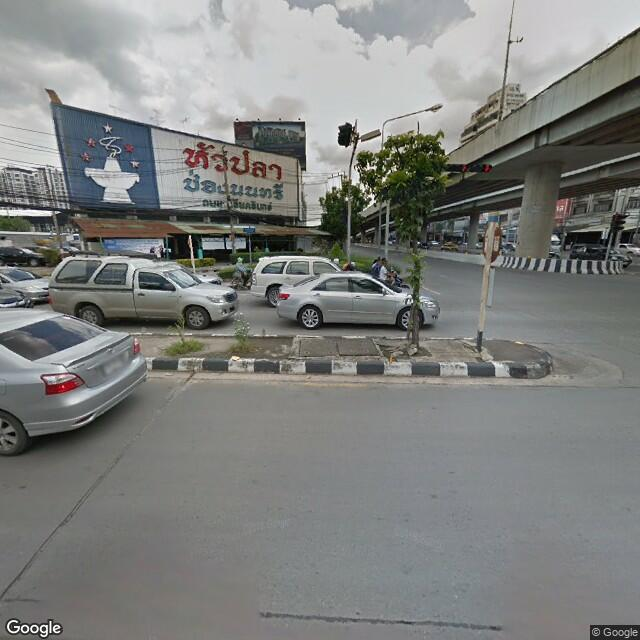

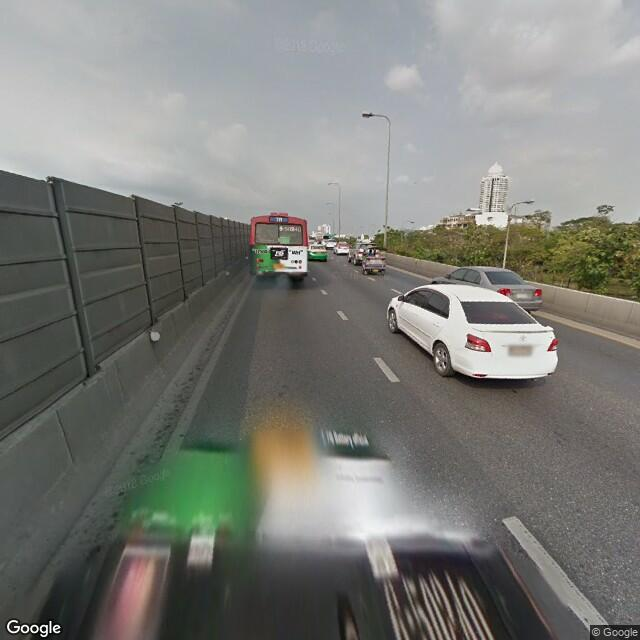

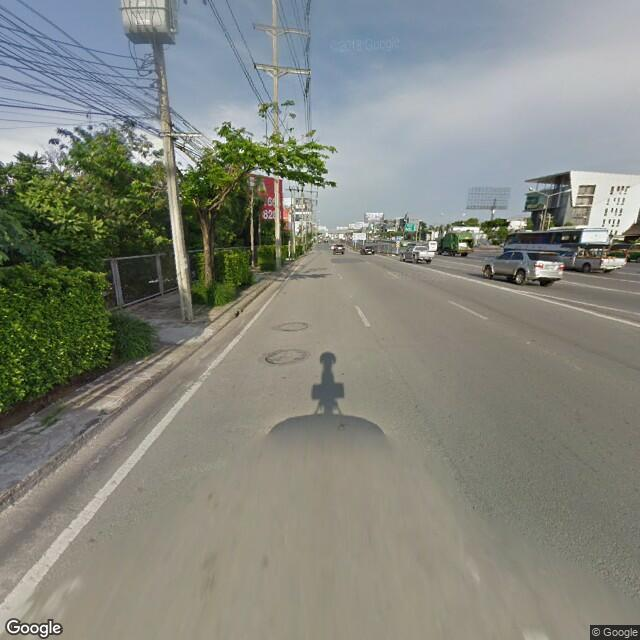

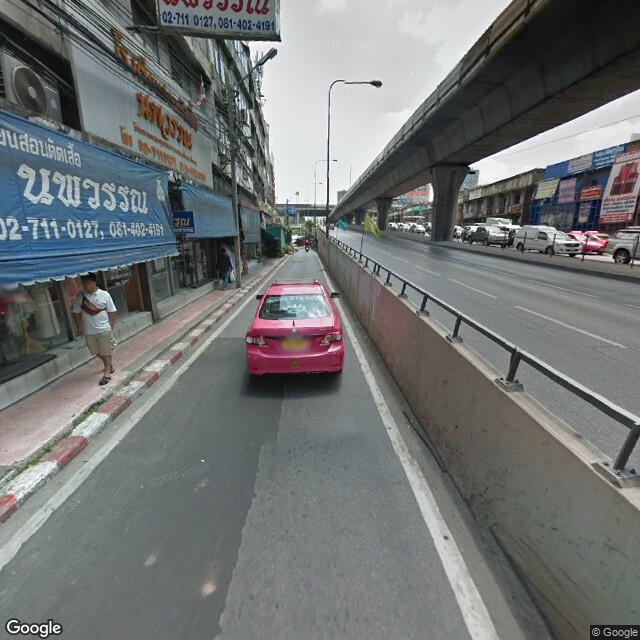

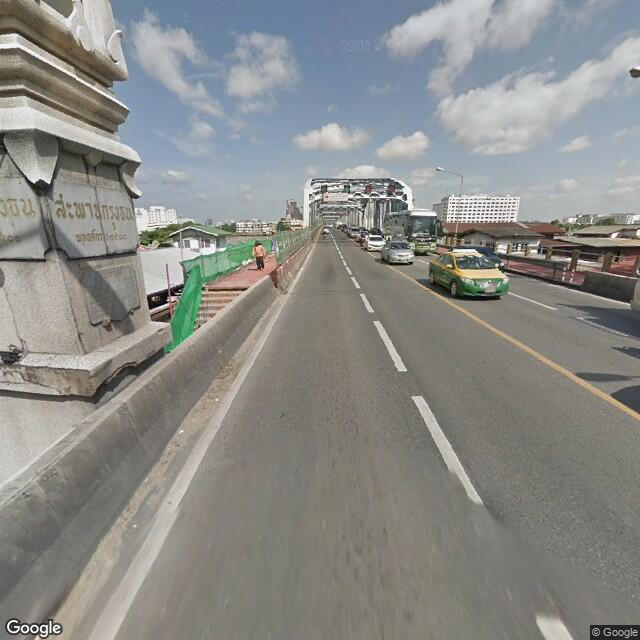

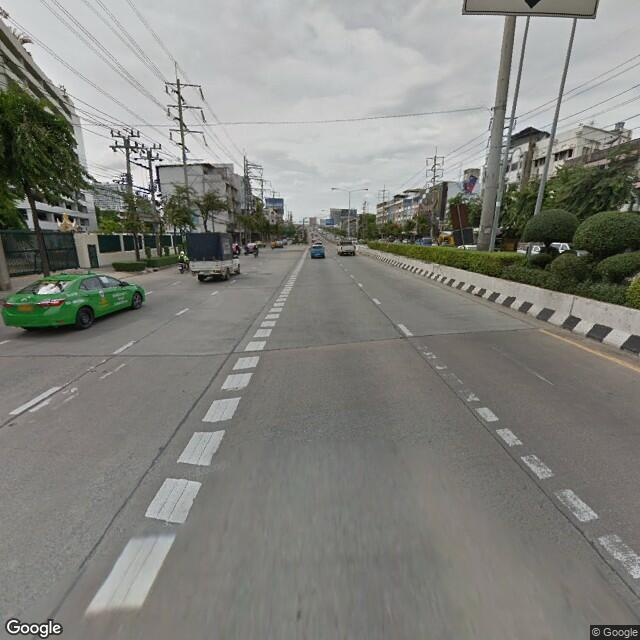

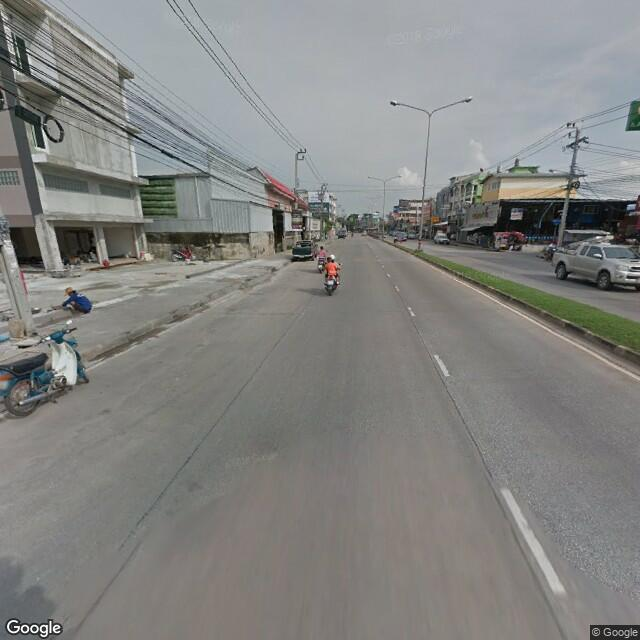

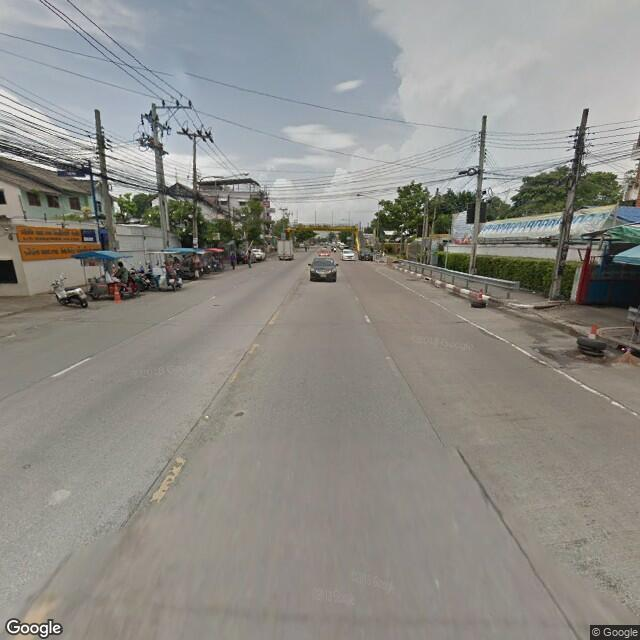

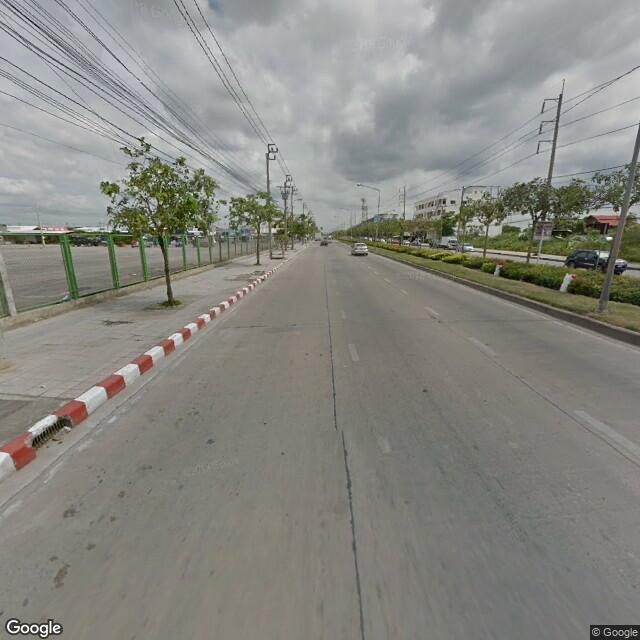

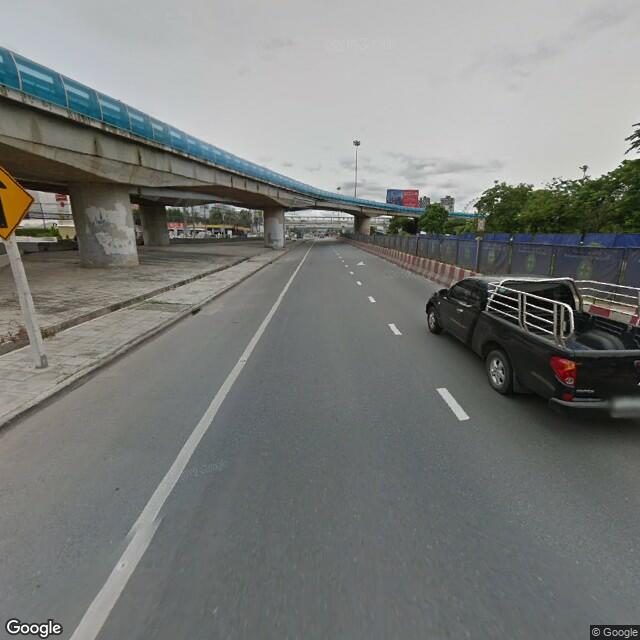

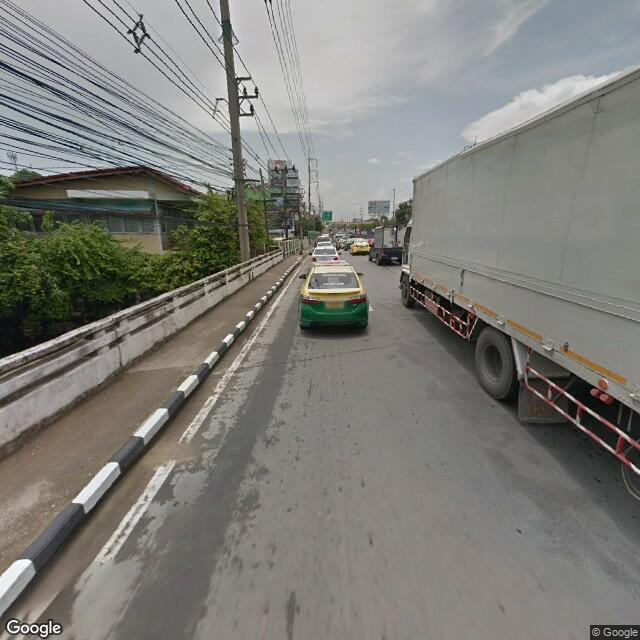

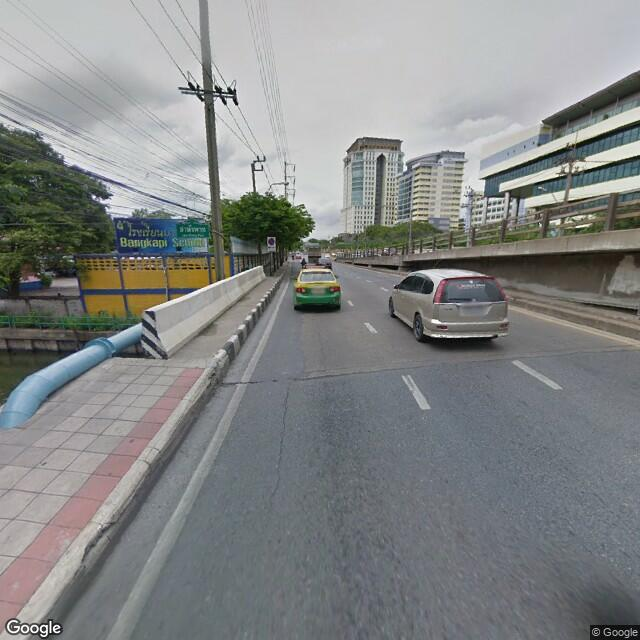

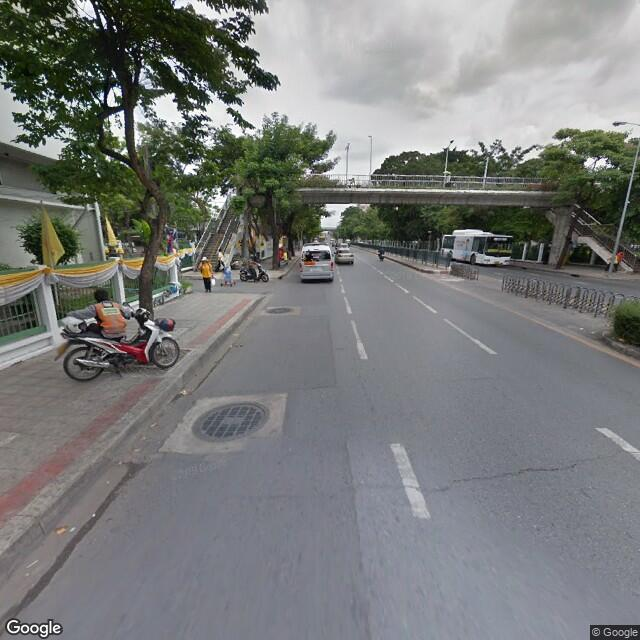

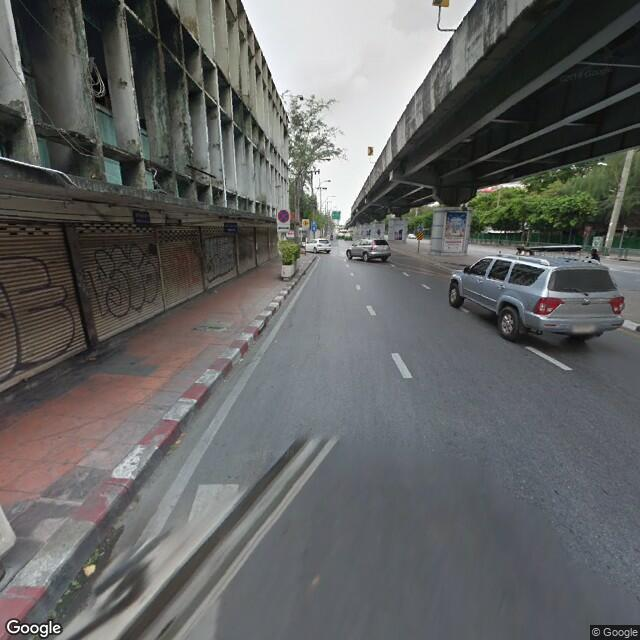

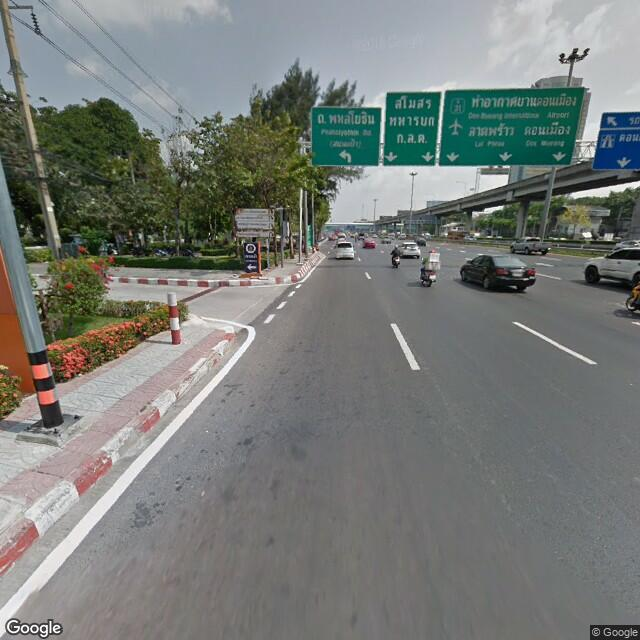

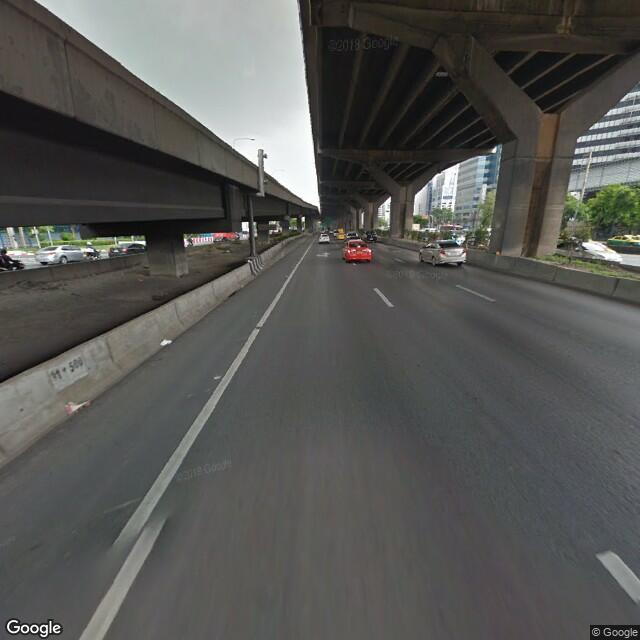

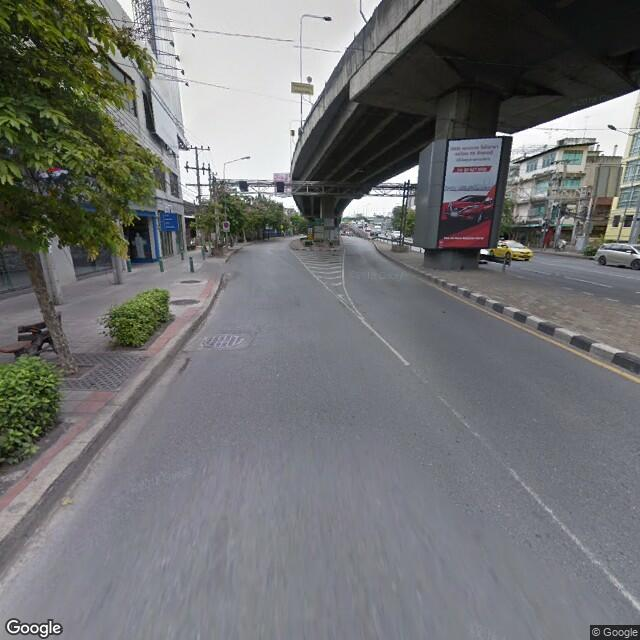

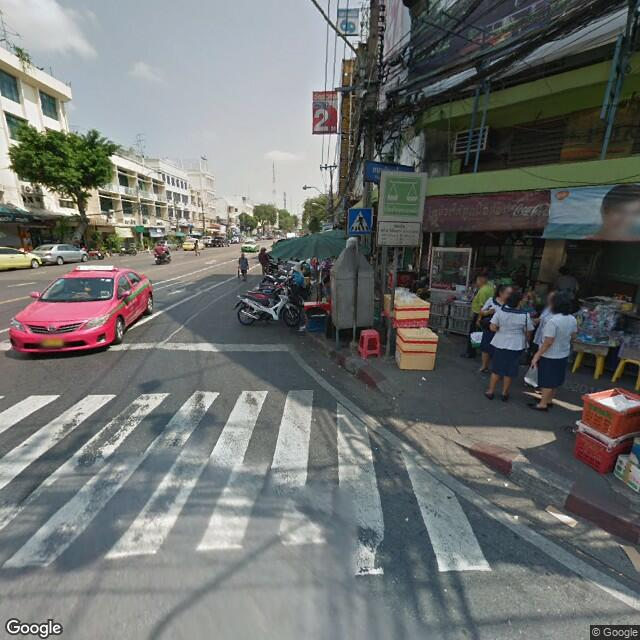

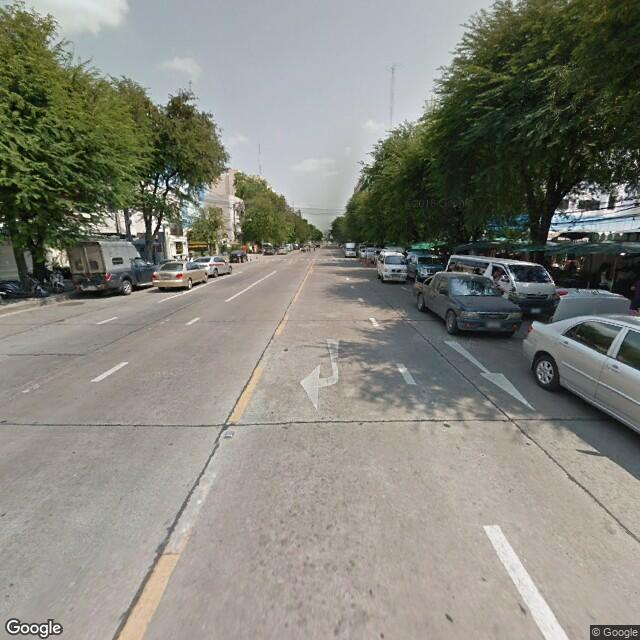

In [17]:
#from ipywidgets import Image
from IPython.display import Image
from IPython.display import display

imgs = ['img0']
images = []
for row in df[imgs].itertuples(index=False):
    for i in range(len(imgs)):
        img = Image(data=b64decode(row[i]), width="640px")
        images.append(img)

display(*images[:10*4])

## Subplot

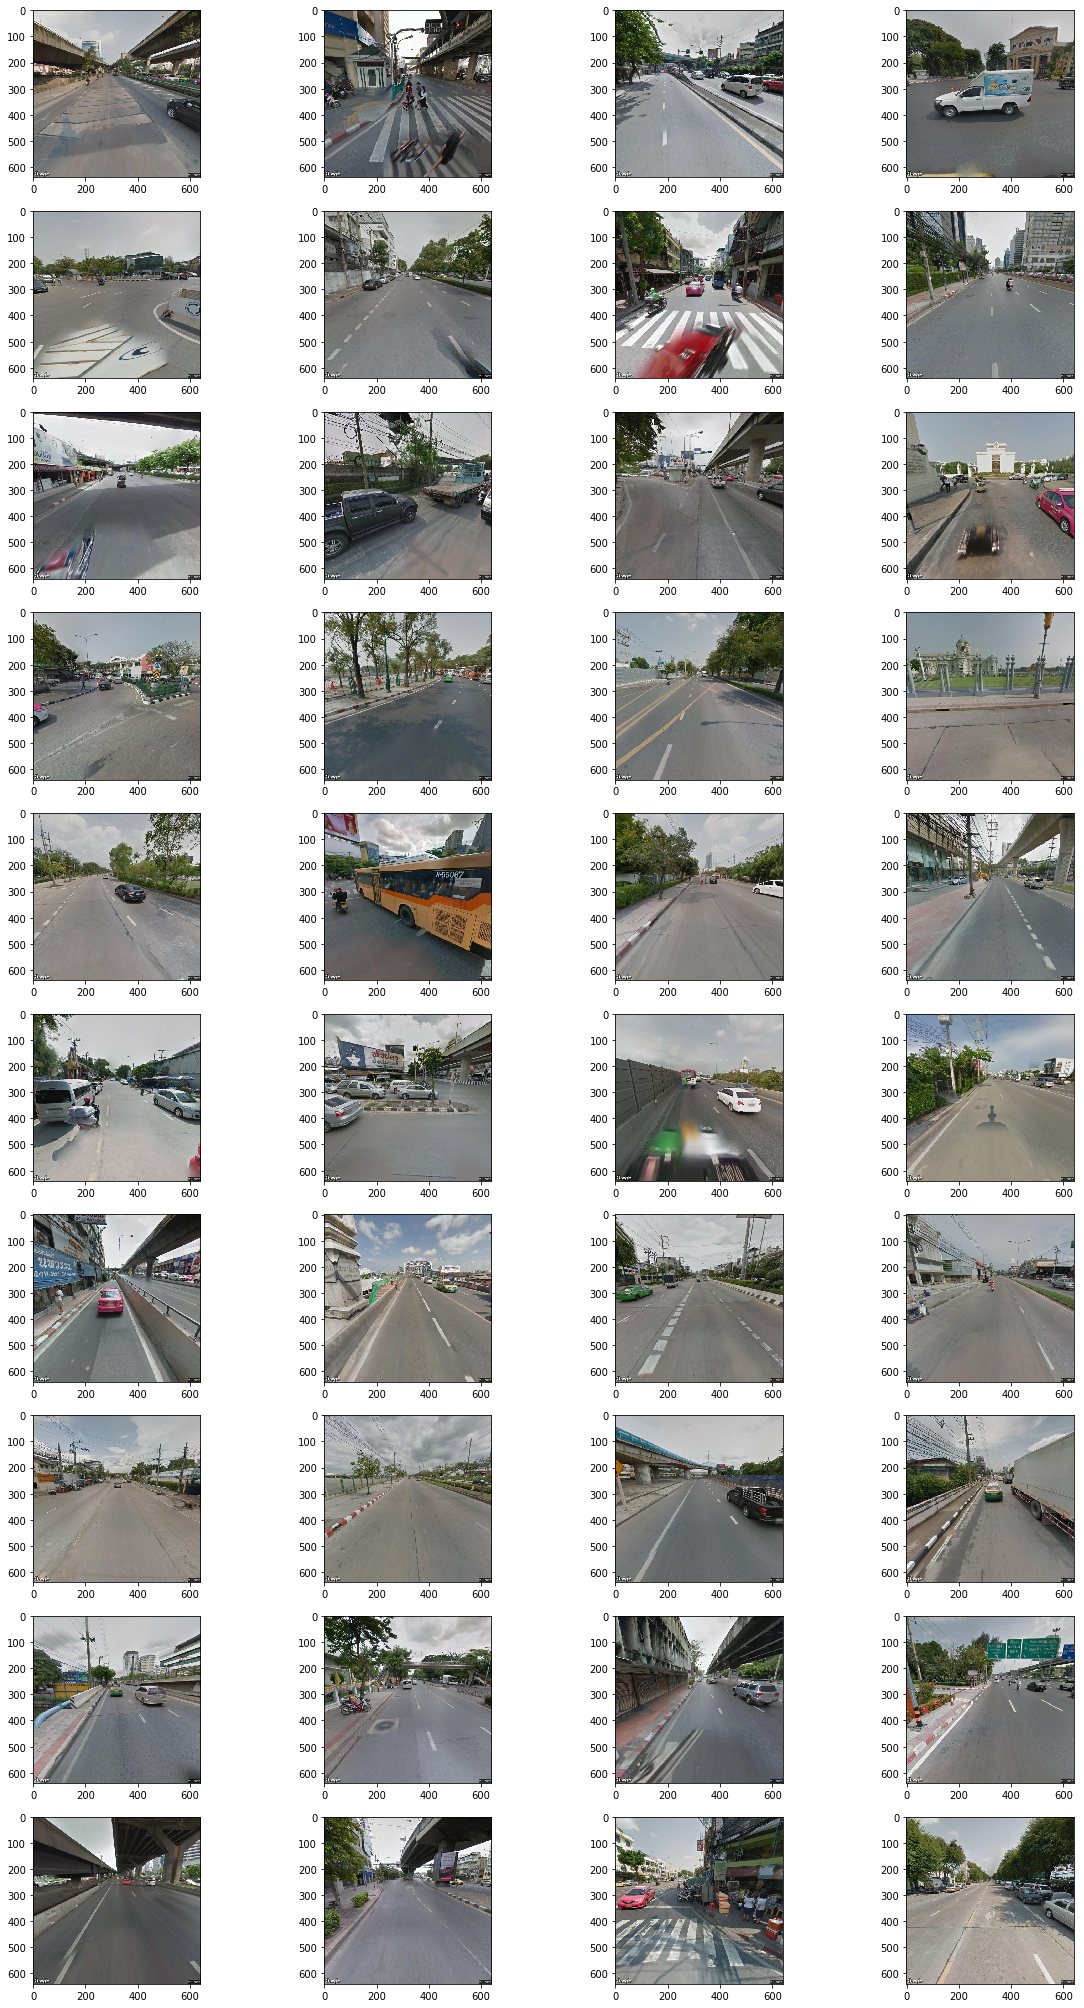

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image as PILImage
from io import BytesIO

plotimages = images[:4*10]
plt.figure(figsize=(20, 40))
columns = 4
for i, image in enumerate(plotimages):
    plt.subplot(len(plotimages) / columns + 1, columns, i + 1)
    img = PILImage.open(BytesIO(image.data))
    plt.imshow(img)


## Export Data for Mturk

In [25]:
df

segment_id     osm_id           osm_name   osm_type  start_lat  \
0             3    9017482        ถนนพระราม 9    primary  13.754620   
1             4    9019480     ถนนพระรามที่ 1    primary  13.744500   
2             6    9166124                NaN    primary  13.763283   
3            17   23609995       ถนนเจริญกรุง   tertiary  13.747431   
4            23   23610163                NaN   tertiary  13.742837   
5            27   24678686    ถนนอังรีดูนังต์  secondary  13.739906   
6            40   24715228        ถนนข้าวหลาม   tertiary  13.736230   
7            47   24829068         ถนนสาทรใต้    primary  13.724676   
8            63   25053555     ถนนพระรามที่ 3    primary  13.716114   
9            71   25507862           อาจณรงค์   tertiary  13.696916   
10           73   25620825     ถนนศรีนครินทร์  secondary  13.656446   
11           82   25706388                NaN  secondary  13.740283   
12           87   25706526                NaN   tertiary  13.741536   
13          101   25714979                NaN   tertiary  13.757876   
14          111   25715223       ถนนศรีอยุธยา  secondary  13.769264   
15          112   25715256        ถนนอู่ทองใน   tertiary  13.770488   
16          121   25745236      ถนนรัชดาภิเษก    primary  13.689547   
17          130   25745938                NaN   tertiary  13.732684   
18          137   25775998        ถนนวัฒนธรรม   tertiary  13.762619   
19          167   26732625        ถนนเพชรเกษม    primary  13.713308   
20          175   27279308            ถนนทหาร   tertiary  13.798635   
21          176   27604257     ถนนศรีนครินทร์  secondary  13.656195   
22          182   28152580    สะพานพระปกเกล้า    primary  13.736476   
23          187   28503268                NaN   tertiary  13.740852   
24          193   28504804        ถนนสุขุมวิท    primary  13.711829   
25          196   28510028        สะพานกรุงธน    primary  13.780269   
26          214   30045712      สะพานพระราม 3    primary  13.694423   
27          222   31133741   ถนนพระยาสุเรนทร์   tertiary  13.835972   
28          226   31133741   ถนนพระยาสุเรนทร์   tertiary  13.818439   
29          232   31142740                NaN   tertiary  13.753075   
..          ...        ...                ...        ...        ...   
970        6083  471408292        ถนนประชาสุข   tertiary  13.785269   
971        6105  479211734                NaN    primary  13.757864   
972        6107  479213808        ถนนราชปรารภ  secondary  13.756085   
973        6125  480611709  ถนนประชาอุทิศ (รา   tertiary  13.762844   
974        6132  480611716  ถนนประชาอุทิศ (รา   tertiary  13.768324   
975        6139  480611724      ถนนประชาอุทิศ   tertiary  13.770158   
976        6141  480960861      ถนนประชาอุทิศ   tertiary  13.770706   
977        6145  480960865      ถนนประชาอุทิศ   tertiary  13.771612   
978        6159  480960879      ถนนประชาอุทิศ   tertiary  13.773639   
979        6179  481757225      ถนนประดิพัทธ์  secondary  13.791993   
980        6187  481757232     ถนนกำแพงเพชร 5   tertiary  13.788184   
981        6188  481757232     ถนนกำแพงเพชร 5   tertiary  13.783989   
982        6195  481778855      ถนนประดิพัทธ์  secondary  13.793233   
983        6201  481778861            ถนนทหาร   tertiary  13.796210   
984        6208  481971016     ถนนพระรามที่ 4    primary  13.720098   
985        6213  482209160        ถนนลาดพร้าว    primary  13.772326   
986        6214  482209160        ถนนลาดพร้าว    primary  13.774570   
987        6222  482209160        ถนนลาดพร้าว    primary  13.792521   
988        6228  482209834     ถนนพระรามที่ 4    primary  13.718828   
989        6230  482209836                NaN   tertiary  13.719026   
990        6231  482384842      ถนนเกษมราษฎร์   tertiary  13.714770   
991        6234  482384845                NaN   tertiary  13.714843   
992        6236  482384847      ถนนเกษมราษฎร์   tertiary  13.714695   
993        6237  482384848                NaN   tertiary  13.714695   
994        6243  482404741   

In [50]:
df['img0'] = df['img0'].str.decode("utf-8")

In [51]:
df.to_csv('bangkok-roads-gsv-road-angle.csv.gz', index_label='id', encoding='utf-8', compression='gzip')

In [52]:
def export_image_to_file(i, data, basename):
    url = '{0:s}{1:04d}.jpg'.format(basename, i)
    with open('mturk/' + url, 'wb') as f:
        raw = b64decode(str(data))
        f.write(raw)
    return url

In [53]:
rdf = pd.read_csv('bangkok-roads-gsv-road-angle.csv.gz')

In [54]:
rdf['url_img0'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img0, 'bangkok/img0_'), axis=1)

In [55]:
del rdf['img0']
rdf.to_csv('mturk/bangkok-road-angle.csv', index=False)